In [8]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [3]:
raw_fp = '../../data/TSLA/ProcData/'
f_name = 'merge_filter_data.csv'

In [29]:
raw_file = os.path.join(raw_fp, f_name)
raw_data = pd.read_csv(raw_file, parse_dates=['time'])

In [30]:
raw_data.head()

,time,open,high,low,close,volume
0,2021-01-15 09:30:00-05:00,853.97,854.5000,850.83,852.0700,27753
1,2021-01-15 09:29:00-05:00,853.00,854.5000,853.00,854.1500,12735
2,2021-01-15 09:28:00-05:00,853.25,853.2500,852.80,852.8000,3754
3,2021-01-15 09:27:00-05:00,853.24,853.2498,853.10,853.2498,2115
4,2021-01-15 09:26:00-05:00,852.98,853.2500,852.98,853.2500,3460


In [31]:
raw_data.time.min()

datetime.datetime(2019, 1, 30, 8, 30, tzinfo=tzoffset(None, -18000))

In [32]:
raw_data.time.max()

datetime.datetime(2021, 1, 15, 9, 30, tzinfo=tzoffset(None, -18000))

In [33]:
raw_data = raw_data.set_index('time')

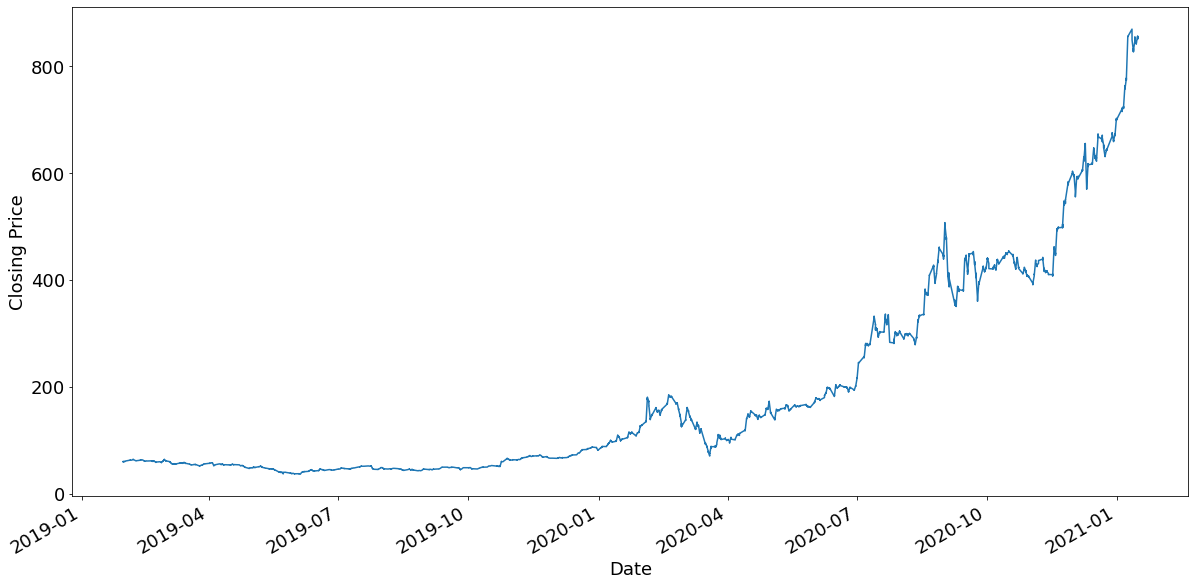

In [49]:
plt.figure(figsize=(20,10))
raw_data.close.plot(fontsize=18)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Closing Price',fontsize=18)
plt.show()

# plt.figsave()